In [37]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras import layers
from keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')



In [38]:
# Load the dataset

from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [39]:
# Look at variable data types

print(type(x_train))
print(type(y_train))
print(type(x_test))
print(type(y_test))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [40]:
# Get shape of arrays

print('x_train shape: ', x_train.shape)
print('y_train shape: ', y_train.shape)
print('x_test shape: ', x_test.shape)
print('y_test shape: ', y_test.shape)

x_train shape:  (50000, 32, 32, 3)
y_train shape:  (50000, 1)
x_test shape:  (10000, 32, 32, 3)
y_test shape:  (10000, 1)


Shape description:
x_train contains 50,000 rows of data containing 32 x 32 sized images and depth = 3
y_train contains 50,000 rows with 1 columns

In [41]:
# take a look at the first image as an array

index = 0
# x_train[index]

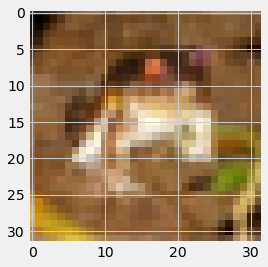

In [42]:
# show image as a picture

img = plt.imshow(x_train[index])

In [43]:
# get image label

print('The image label is: ', y_train[index])

The image label is:  [6]


In [44]:
# Get the image classification

classification = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

print('Image class is: ', classification[y_train[index][0]])

Image class is:  frog


In [45]:
# Convert labels into set of 10 numbers to input into nueral network

y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

In [46]:
print(y_train_one_hot)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]]


In [47]:
#Print new label of current picture above

print('The one hot label is: ', y_train_one_hot[index])

The one hot label is:  [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


In [48]:
#Normalize pixels to be values between 0 and 1

x_train = x_train / 255
x_test = x_test / 255

# x_train[index]

In [49]:
#Create models architecture

model = Sequential()

#Add first layer
model.add(Conv2D(32, (5,5), activation='relu', input_shape=(32,32,3)))

#Add pooling layer
model.add(MaxPooling2D(pool_size=(2,2)))

#Add another convulatiuon layer
model.add(Conv2D(32, (5,5), activation='relu'))

#Add another pooling layer
model.add(MaxPooling2D(pool_size=(2,2)))

#Add a flatterning layer
model.add(Flatten())

#Add a layer with 1000 nuerons
model.add(Dense(1000, activation='relu'))

#Add a drop out layer
model.add(Dropout(0.5))

#Add another layer with 500 nuerons
model.add(Dense(500, activation='relu'))

#Add another drop out layer
model.add(Dropout(0.5))

#Add another layer of 250 nuerons
model.add(Dense(250, activation='relu'))

#Add another layer of 10 nuerons
model.add(Dense(10, activation='softmax'))

In [50]:
#Compile the model

model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [51]:
#Train the model

hist = model.fit(x_train, y_train_one_hot, batch_size = 256, epochs = 10, validation_split = 0.2)

Epoch 1/10
157/157 [==============================] - 21s 130ms/step - loss: 1.7739 - accuracy: 0.3322 - val_loss: 1.5369 - val_accuracy: 0.4492
Epoch 2/10
157/157 [==============================] - 18s 116ms/step - loss: 1.3828 - accuracy: 0.4966 - val_loss: 1.2485 - val_accuracy: 0.5526
Epoch 3/10
157/157 [==============================] - 18s 117ms/step - loss: 1.2286 - accuracy: 0.5581 - val_loss: 1.1901 - val_accuracy: 0.5817
Epoch 4/10
157/157 [==============================] - 18s 116ms/step - loss: 1.1260 - accuracy: 0.5975 - val_loss: 1.0708 - val_accuracy: 0.6171
Epoch 5/10
157/157 [==============================] - 18s 117ms/step - loss: 1.0300 - accuracy: 0.6362 - val_loss: 1.0627 - val_accuracy: 0.6274
Epoch 6/10
157/157 [==============================] - 18s 117ms/step - loss: 0.9515 - accuracy: 0.6655 - val_loss: 0.9950 - val_accuracy: 0.6496
Epoch 7/10
157/157 [==============================] - 18s 117ms/step - loss: 0.8787 - accuracy: 0.6884 - val_loss: 0.9781 - val_ac

In [52]:
#Evaluate the model using test data set

model.evaluate(x_test, y_test_one_hot)[1]

313/313 [==============================] - 2s 6ms/step - loss: 0.9188 - accuracy: 0.6885


0.6884999871253967

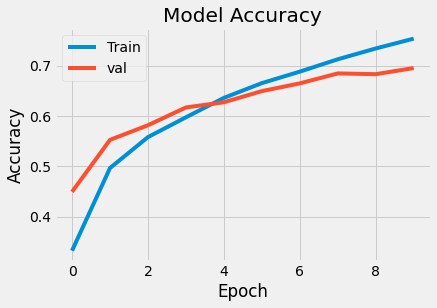

In [54]:
# Visualize the models accuracy

plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'val'], loc='upper left')
plt.show()

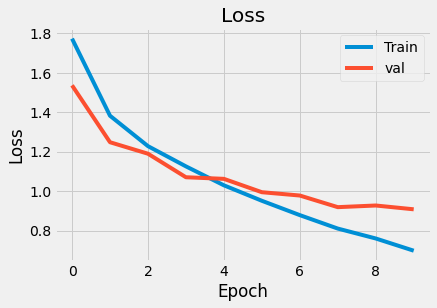

In [55]:
#Visualize model loss

plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'val'], loc='upper right')
plt.show()

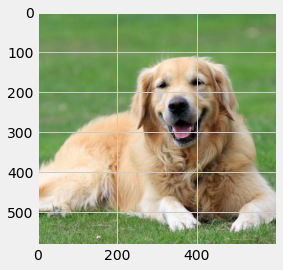

In [59]:
#Test model with an example

uploaded = open('golden.jpg')

#show image
new_image = plt.imread('golden.jpg')
img = plt.imshow(new_image)

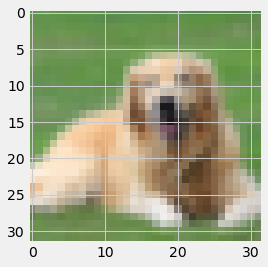

In [62]:
#Resize the image

from skimage.transform import resize

resized_img = resize(new_image, (32,32,3))
img = plt.imshow(resized_img)

In [63]:
#Get models predictions

predictions = model.predict(np.array([resized_img]))
predictions

1/1 [==============================] - 0s 150ms/step


array([[3.6622732e-04, 1.3561349e-04, 1.5117218e-02, 8.0555417e-02,
        2.0130349e-02, 8.7030184e-01, 6.0475012e-03, 6.6912170e-03,
        2.7085902e-04, 3.8381721e-04]], dtype=float32)

In [70]:
#Most likely prediction
classification[np.argmax(predictions)]

'dog'